 <span style="color:blue"> 

# <span style="color:orange"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue"> Numerical excercise 1 </span>

In this first Notebook we want to test the goodness of the pseudo-random number generator downloaded from the NSL Ariel web site.

### <font color="green"> Excercise 1.1  
    
The excercise 1.1 is divided in three sub-points:
    
1. Estimation of the value of the integral $\langle r \rangle = \int_0^1 r dr $, graphic representation  of the mean value  $\langle r \rangle - 1/2  $ and his respective error as the number of throws increases (as function of the number of block N).
 

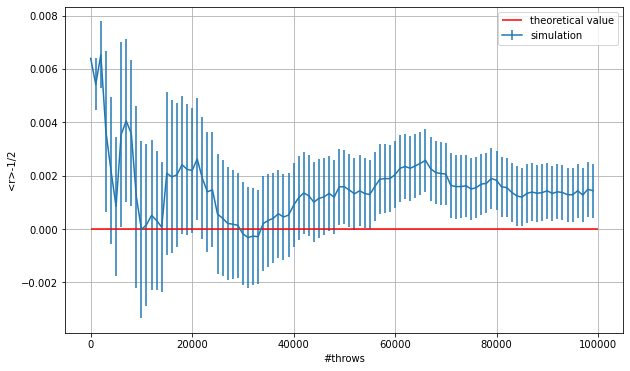

best estimate of the integral:  0.501  +/-  0.001
confidence level with theoretical value:  1.4 sigma


In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M=100000
N=100
L=int(M/N)
x = np.arange(N) 

x*=L
sum_prog,error = np.loadtxt("ex_1.1.1.dat", usecols=(0,1),delimiter=' ', unpack='true')

fig = plt.figure(figsize = (10,6) )
plt.errorbar(x,sum_prog -0.5,yerr=error, label="simulation")
plt.hlines(0,0,M,color="red", label = "theoretical value")
plt.legend()
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)

plt.show()

print("best estimate of the integral: ", round(sum_prog[-1],3), " +/- ", round(error[-1],3)  )
print("confidence level with theoretical value: ",round ((sum_prog[-1] - 0.5)/error[-1],1),"sigma")


From the graph above we see that the estimated value is within two sigma and therefore acceptable

2. Calculation of the standard deviation $\sigma^2 = \int_0^1 (r-1/2)^2 dr$ and graphical representation of $\langle \sigma^2 \rangle -1/12$ with respective error bars as the number M of draws increases.

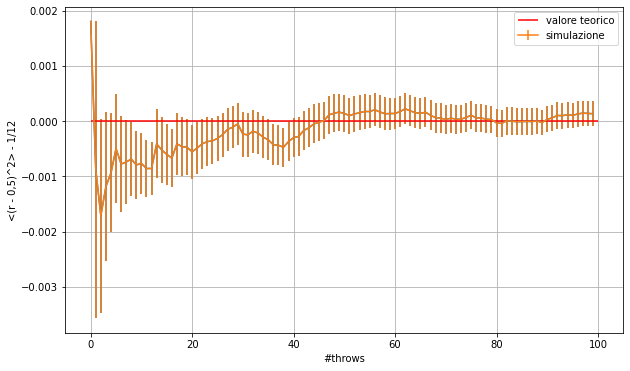

best estimate of the integral:  0.0835  +/-  0.0002
confidence level with theoretical value:  0.6 sigma


In [16]:
sum_prog,error = np.loadtxt("ex_1.1.2.dat", usecols=(0,1),delimiter=' ', unpack='true')

fig = plt.figure(figsize = (10,6) )
plt.errorbar(x,sum_prog - 1/12,yerr=error)
plt.errorbar(x,sum_prog -1/12,yerr=error, label="simulazione")
plt.hlines(0,0,M,color="red", label = "valore teorico")
plt.legend()
plt.xlabel('#throws')
plt.ylabel('<(r - 0,5)^2> - 1/12')
plt.grid(True)

plt.show()
print("best estimate of the integral: ", round(sum_prog[-1],4)," +/- ",round(error[-1],4) )
print("confidence level with theoretical value: ",round ((sum_prog[-1] - 1/12)/error[-1],3),"sigma")


Even from this graph we can see a good convergence of the result.

3. test for the probability that r numbers follow a uniform distribution. 
Since in statistics it is not possible to test whether a given sequence of numbers follow a certain distribution, we perform a $\chi^2$ test to observe that the probability that r numbers do NOT follow a uniform distribution is low.


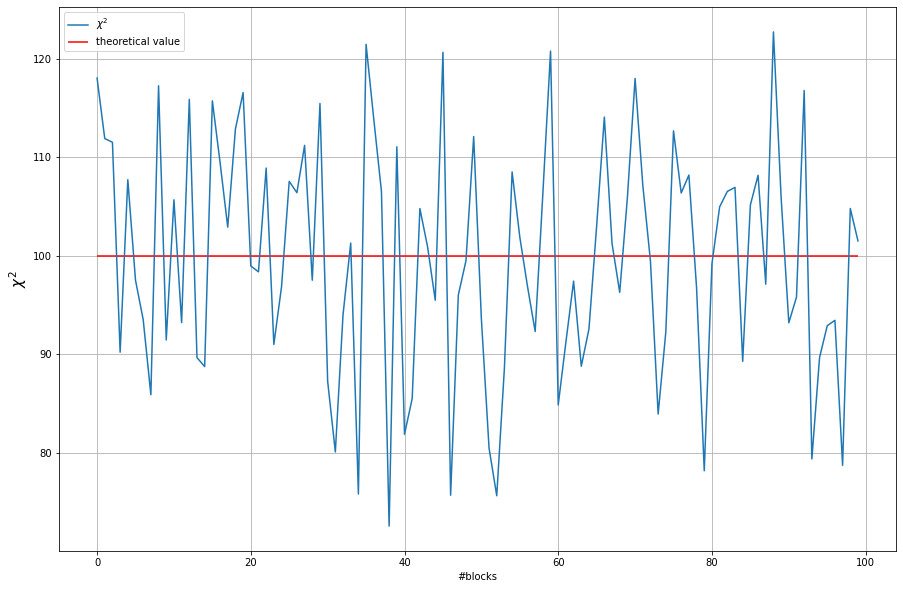

Average chi^2 =  99.8069


In [18]:
M=100
n=10000

x = np.arange(M) 
chi_prog = np.loadtxt("ex_1.1.3.dat")

fig = plt.figure(figsize = (15,10) )
plt.plot(x,chi_prog, label = "$\chi^{2}$")
plt.xlabel('#blocks')
plt.ylabel("$\chi^{2}$",fontsize = 15)
plt.hlines(100,0,x[-1], label ="theoretical value", color = "red")
plt.grid(True)
plt.legend(loc = 'best')
plt.show()


chi2avg = np.sum(chi_prog)/M
print("Average chi^2 = ", chi2avg)

From the chi square test we see that the average value of 100 blocks is very close to the value we expected.  This implies that we cannot say that the analyzed data do not follow a uniform distribution, so we assume that the opposite holds true.


 ### <font color="green">Exercise 1.2
Verification of the central limit theorem.
The following are three figures containing histograms of $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), for the uniform, eponential and Lorentzian distributions, respectively. 
For the histogram with $N==100$ we performed a fit with a Gaussian for the first two distributions and with a Cauchy-Lorentz for the third.


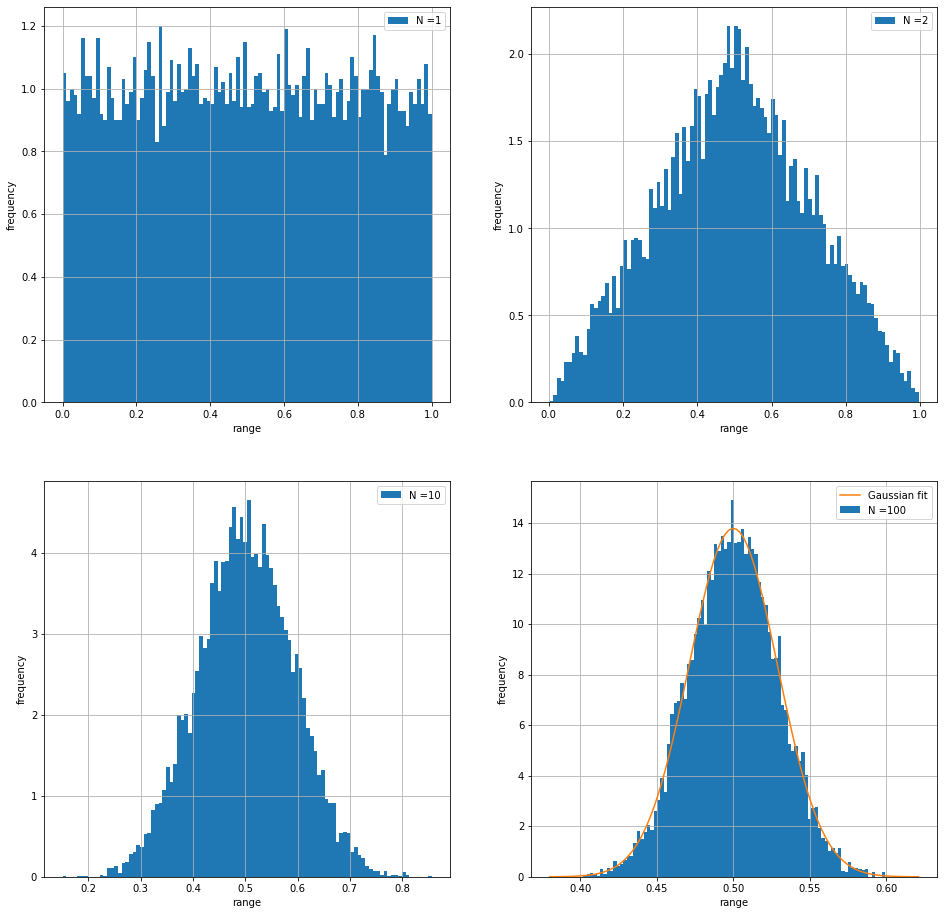

In [24]:
from scipy.stats import norm

N=[1,2,10,100]

x=np.arange(10000)

sum= np.loadtxt('unif_1.2.dat', usecols=(0,1,2,3), delimiter=' ', unpack='true')

n_bins = 100
fig, axs = plt.subplots(2,2, figsize = (16,16) )
axs[0,0].hist(sum[0], n_bins, density= 'true', label = "N =" + str(N[0]))
axs[0,1].hist(sum[1], n_bins, density= 'true', label = "N =" + str(N[1]))
axs[1,0].hist(sum[2], n_bins, density= 'true', label = "N =" + str(N[2]))
axs[1,1].hist(sum[3], n_bins, density= 'true', label = "N =" + str(N[3]))

mean,std=norm.fit(sum[3])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
axs[1,1].plot(x,y, label = "Gaussian fit")

for i in range(2) :
    for j in range(2):
        axs[i,j].set_xlabel('range')
        axs[i,j].set_ylabel('frequency')
        axs[i,j].grid(True)
        axs[i,j].legend()
plt.show()

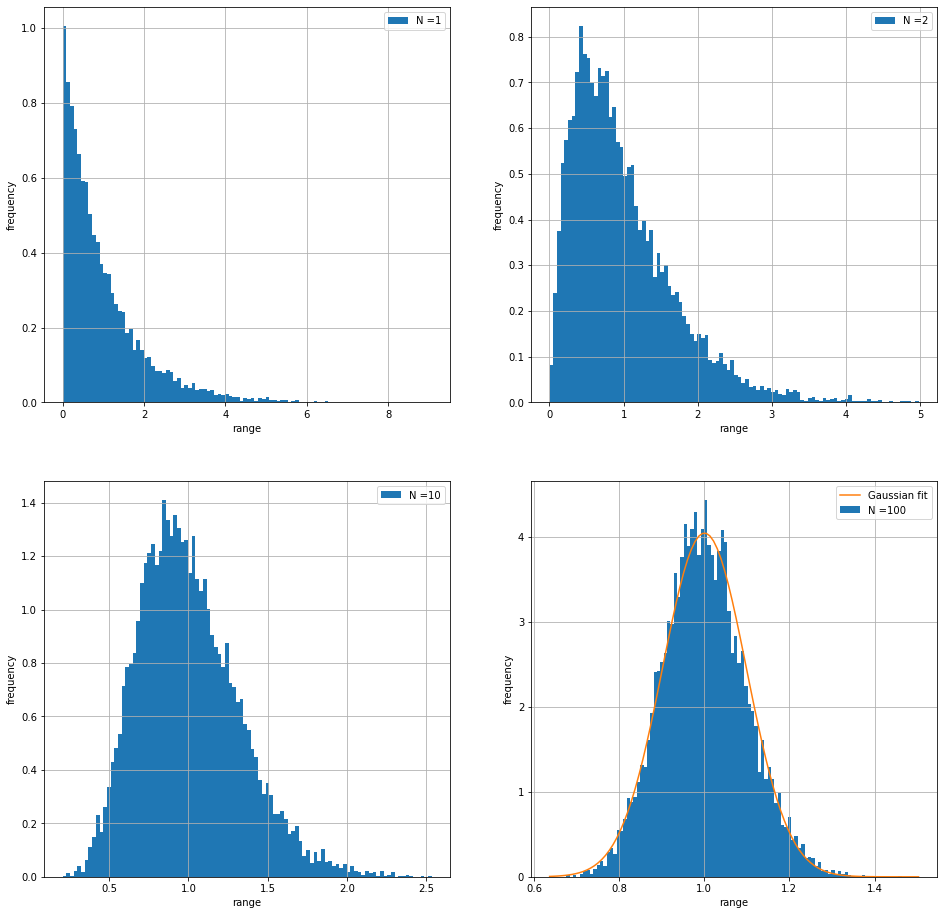

In [26]:
N=[1,2,10,100]

x=np.arange(10000)


sum= np.loadtxt('exp_1.2.dat', usecols=(0,1,2,3), delimiter=' ', unpack='true')

n_bins = 100

fig, axs = plt.subplots(2,2, figsize = (16,16) )
axs[0,0].hist(sum[0], n_bins, density= 'true', label = "N =" + str(N[0]))
axs[0,1].hist(sum[1], n_bins, density= 'true', label = "N =" + str(N[1]))
axs[1,0].hist(sum[2], n_bins, density= 'true', label = "N =" + str(N[2]))
axs[1,1].hist(sum[3], n_bins, density= 'true', label = "N =" + str(N[3]))

mean,std=norm.fit(sum[3])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
axs[1,1].plot(x,y, label = "Gaussian fit")

for i in range(2) :
    for j in range(2):
        axs[i,j].set_xlabel('range')
        axs[i,j].set_ylabel('frequency')
        axs[i,j].grid(True)
        axs[i,j].legend()
plt.show()

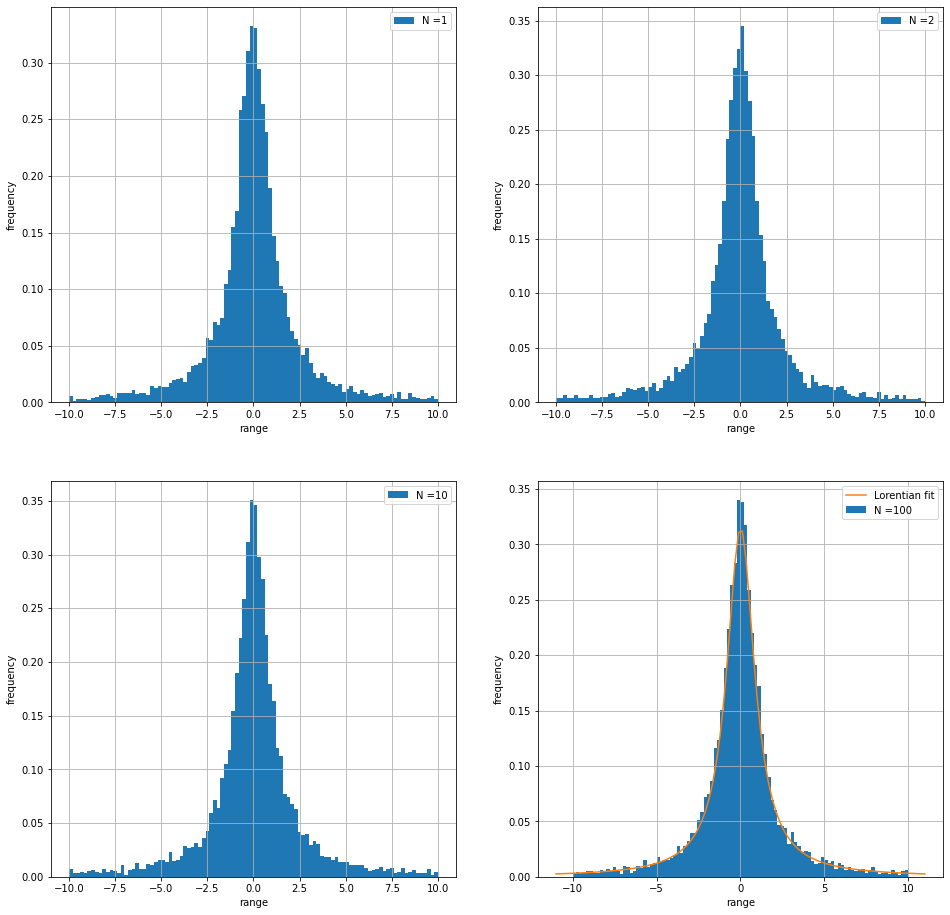

In [28]:
from scipy.stats import cauchy
N=[1,2,10,100]

x=np.arange(10000)


sum= np.loadtxt('lor_1.2.dat', usecols=(0,1,2,3), delimiter=' ', unpack='true')

n_bins = 100

fig, axs = plt.subplots(2,2, figsize = (16,16) )
axs[0,0].hist(sum[0], n_bins, density= 'true', range = (-10,10), label = "N =" + str(N[0]))
axs[0,1].hist(sum[1], n_bins, density= 'true', range = (-10,10), label = "N =" + str(N[1]))
axs[1,0].hist(sum[2], n_bins, density= 'true', range = (-10,10), label = "N =" + str(N[2]))
axs[1,1].hist(sum[3], n_bins, density= 'true', range = (-10,10), label = "N =" + str(N[3]))

mean,std=cauchy.fit(sum[3])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = cauchy.pdf(x, mean, std)
axs[1,1].plot(x, y, label = "Lorentian fit") 

for i in range(2) :
    for j in range(2):
        axs[i,j].set_xlabel('range')
        axs[i,j].set_ylabel('frequency')
        axs[i,j].grid(True)
        axs[i,j].legend()
plt.show()

### <font color="green">Exercise 1.3
Simulation of Buffon's experiment to derive the value of $\pi$.
A stick of length $L$ is randomly thrown along a plane surface with horizontal lines at distance $d$.
The probability of intersection of the stick with one of the lines is $P = 2L/\pi d$. By making $N$ throws and counting how many times the stick hits a line ($N_{hit}$), it is possible to estimate the value of $\pi$ according to the following relationship:
    $\pi = \frac{2L}{Pd} = \lim_{N\to \infty}\frac{2LN}{N_{hit}d}$$  
    
The following graph presents the results obtained for $ N = 100 $ blocks with $M = 10^5 $ steps each.
  

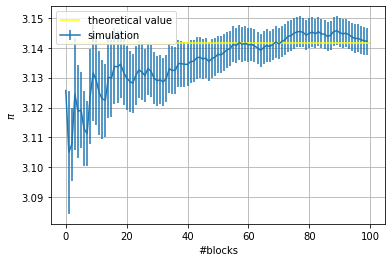

final pi value:  3.142  +\-  0.005


In [30]:
M=100000
N=100
K=int(M/N)
x = np.arange(N) 

pi_prog, error = np.loadtxt("pi.dat", usecols=(1,2), delimiter=' ', unpack='true')

plt.errorbar(x,pi_prog ,yerr=error, label="simulation")
plt.xlabel('#blocks')
plt.ylabel('$\pi$')
plt.hlines(np.pi,0,N, color = "yellow", label = "theoretical value")
plt.legend(loc = 'best')
plt.grid(True)
plt.show()
print("final pi value: " , round(pi_prog[-1],3) , " +\- " ,round(error[-1],3))